__OTSU BINARIZATION__ is suitable for BIMODAL images (histogram containing TWO PEAKS)

In [32]:
import cv2
import matplotlib.pyplot as plt

In [33]:
def img_plt(color_img, title, pos):

    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(2, 2, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


def hist_plt_gray(hist, title, pos, color, t=-1):
    """Shows the histogram using matplotlib capabilities"""

    ax = plt.subplot(2, 2, pos)
    plt.title(title)
    plt.xlabel("bins")
    plt.ylabel("number of pixels")
    plt.xlim([0, 256])
    plt.axvline(x=t, color='m', linestyle='--')
    plt.plot(hist, color=color)


# Create the dimensions of the figure and set title and color:
fig = plt.figure(figsize=(10, 10))
plt.suptitle("Otsu's binarization algorithm", fontsize=14, fontweight='bold')

Text(0.5, 0.98, "Otsu's binarization algorithm")

<Figure size 720x720 with 0 Axes>

In [34]:
# Load the image and convert it to grayscale:
image = cv2.imread('images/leaf.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [35]:
# Calculate histogram (only for visualization):
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

with ``cv2.THRESH_OTSU`` there is no need to mention threshold value. The algorithm then finds the optimal threshold value which is returned as the first output ``ret``.

``THRESH_OTSU`` can be combined with ``cv2.THRESH_BINARY``,
``cv2.THRESH_BINARY_INV``, ``cv2.THRESH_TRUNC``, ``cv2.THRESH_TOZERO``, and ``cv2.THRESH_TOZERO_INV``.

Threshold Value determined by OTSU algorithm 166.0


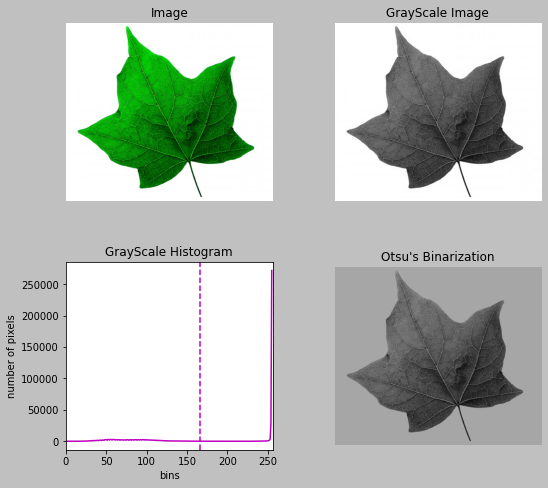

In [38]:
# Threshold the image aplying Otsu's algorithm:
ret1, th1 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_TRUNC + cv2.THRESH_OTSU)
print("======================")
print("Threshold Value determined by OTSU algorithm",ret1)
print("======================")

# Plot all the images:
img_plt(image, "Image", 1)
img_plt(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "GrayScale Image", 2)
hist_plt_gray(hist, "GrayScale Histogram", 3, 'm', ret1)
img_plt(cv2.cvtColor(th1, cv2.COLOR_GRAY2BGR), "Otsu's Binarization", 4)

plt.subplots_adjust(top=3,bottom=1.5, right=1.3, left=0.2, wspace=0.3, hspace=0.3)
plt.show()
